In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


In [2]:
# Add channel dimension to the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)

# Data augmentation for training images
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(train_images)

# Create a CNN model with hyperparameter tuning and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=20, validation_data=(val_images, val_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
844/844 [==============================] - 11s 12ms/step - loss: 0.3786 - accuracy: 0.8793 - val_loss: 0.0692 - val_accuracy: 0.9808
Epoch 2/20
844/844 [==============================] - 11s 14ms/step - loss: 0.1269 - accuracy: 0.9610 - val_loss: 0.0372 - val_accuracy: 0.9890
Epoch 3/20
844/844 [==============================] - 12s 14ms/step - loss: 0.0967 - accuracy: 0.9704 - val_loss: 0.0362 - val_accuracy: 0.9897
Epoch 4/20
844/844 [==============================] - 14s 16ms/step - loss: 0.0791 - accuracy: 0.9760 - val_loss: 0.0365 - val_accuracy: 0.9892
Epoch 5/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0704 - accuracy: 0.9779 - val_loss: 0.0357 - val_accuracy: 0.9900
Epoch 6/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0638 - accuracy: 0.9806 - val_loss: 0.0286 - val_accuracy: 0.9912
Epoch 7/20
844/844 [==============================] - 14s 17ms/step - loss: 0.0570 - accuracy: 0.9826 - val_loss: 0.0306 - val_accuracy:

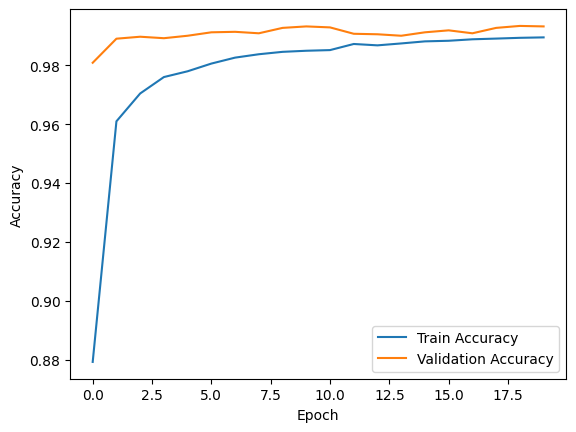

In [4]:
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()